# Project 3: Drone Delivery

### APMA 3100 Probability

#### Authors: Sonya Gar.. (i cant remember how its spelled), Joshua Tapp


## Model Analysis


## Graphs
## $f_X (x)$

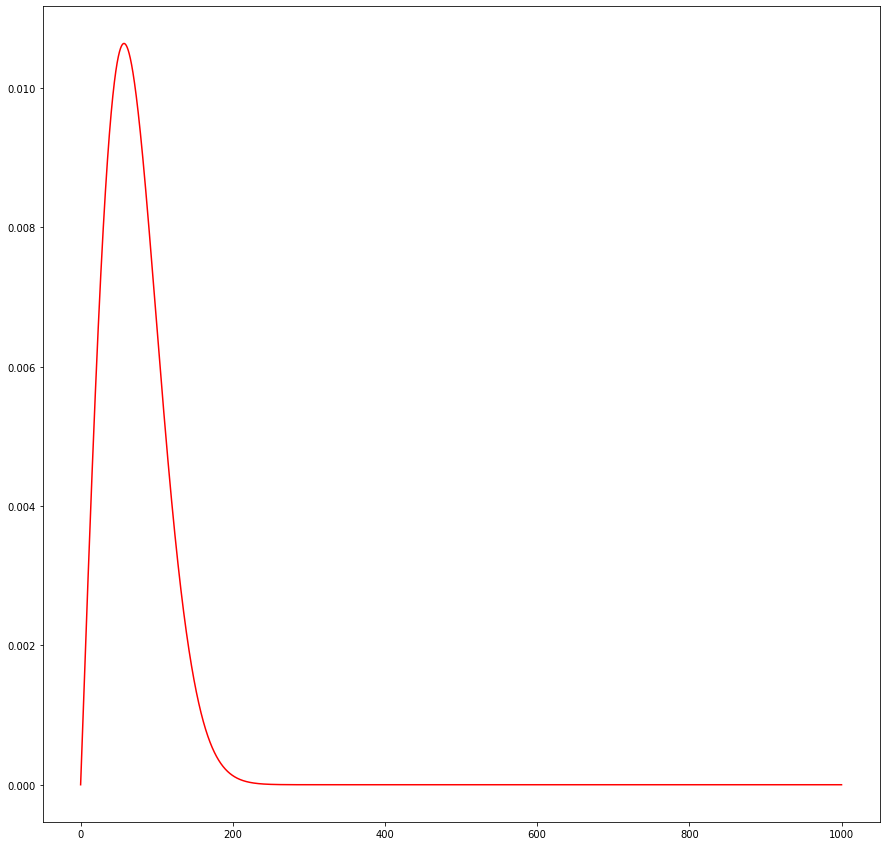

In [460]:
plotpdf(57)

## $F_X (x)$

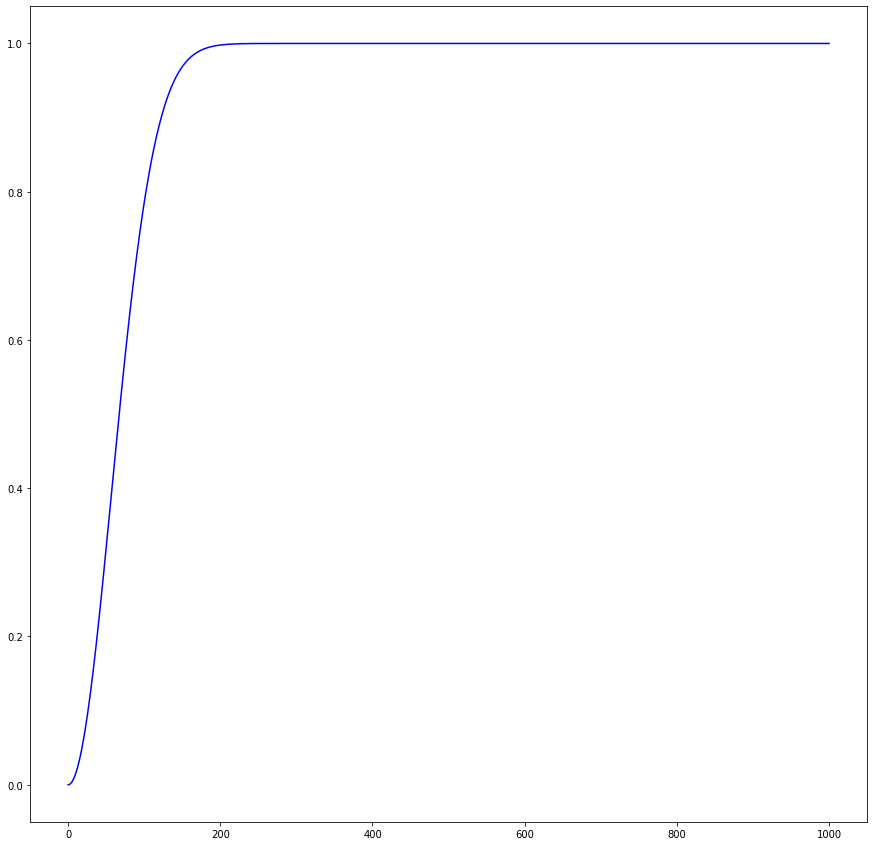

In [461]:
plotcdf(57)

### Area of Distribution W.R.T:  $F_X(x) = 0.5$, $F_X(x) = 0.7$, $F_X(x) = 0.9$ 

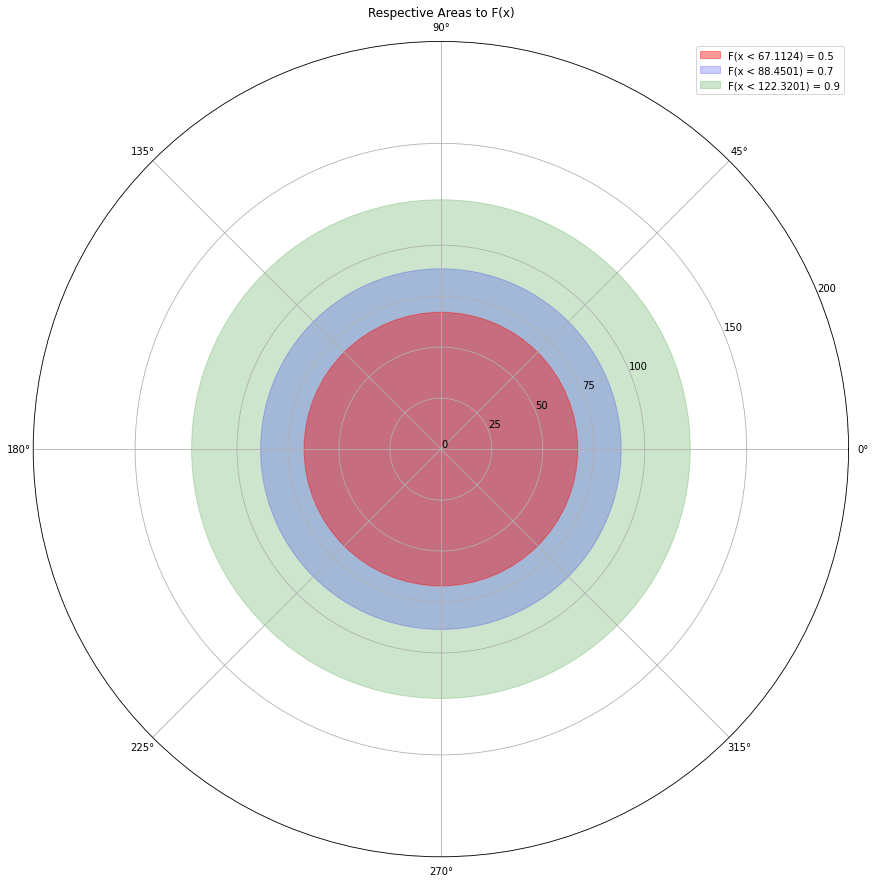

In [463]:
graphCircles()

## Law of Large Numbers

## Central Limit Theorem

In [453]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def pdf(t, x):       #pdf of Rayleigh distribution
    a = 1/t
    if(x > 0):
        return ( pow(a, 2) * x * np.exp( -.5*pow(a, 2)* pow(x, 2) ) )
    
    else:
        return 0    # error x <= 0 
    
def cdf(t, x):       #cdf of Rayleigh distribution
    a = 1/t
    if(x > 0):
        return ( 1 - np.exp( -0.5 * pow( a, 2 ) * pow( x, 2 ) ) ) 
    
    else:
        return 0    # error x <= 0

def inverseCDF(t, p):
    a = 1/t
    return np.sqrt( ( ( np.log( pow( ( (p - 1) * -1 ), -1) ) )  / ( pow( a, 2 ) / 2 ) ) )


def meanRayleigh(t):
    return ( ( t ) * np.sqrt( math.pi / 2 ) )

def varRayleigh(t):
    a = 1/t
    return ( ( 4 - np.pi ) / ( 2 * pow( a, 2 ) ) )

def plotpdf(t):
    a = 1/t
    x = np.linspace(0,1000, 100000)
    y = ( pow(a, 2) * x * np.exp( -.5*pow(a, 2)* pow(x, 2) ) )
    plt.figure(figsize=(15,15))
    plt.plot(x,y, 'r')
    
def plotcdf(t):
    a = 1/t
    x = np.linspace(0,1000, 100000)
    y = ( 1 - np.exp( -0.5 * pow( a, 2 ) * pow( x, 2 ) ) ) 
    plt.figure(figsize=(15,15))
    plt.plot(x,y, 'b')

def graphCircles():
    plt.figure(figsize=(15,15))
    ax = plt.subplot(1, 1, 1, polar=True, aspect='auto')

    plt.title("Respective Areas to F(x)")
    lines, labels = plt.rgrids( (0, 25, 50, 75, 100, 150, 200))
    r1 = inverseCDF(57, .5)
    r2 = inverseCDF(57, .7)
    r3 = inverseCDF(57, .9)
    circle1 = pl.Circle( (0, 0), r1, transform=ax.transData._b, color="red", alpha=0.4)
    circle1.set_label('circle1')
    circle2 = pl.Circle( (0, 0), r2, transform=ax.transData._b, color="blue", alpha=0.2)
    circle3 = pl.Circle( (0, 0), r3, transform=ax.transData._b, color="green", alpha=0.2)
    circles = [circle1, circle2, circle3]
    ax.legend(circles, [ format('F(x < %3.4f) = 0.5' % r1), format('F(x < %3.4f) = 0.7' % r2), format('F(x < %3.4f) = 0.9' % r3) ])
    ax.add_artist(circle3)
    ax.add_artist(circle2)
    ax.add_artist(circle1)
    
# =)
